In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('ready')

ready


In [3]:
#taxis 데이터 불러오기
data = sns.load_dataset('taxis')

In [4]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [6]:
#기본 정보 확인

print("데이터 형태", data.shape)
print("결측치 개수")
print(data.isna().sum())

데이터 형태 (6433, 14)
결측치 개수
pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [8]:
#수치형 변수 요약 통계표 확인

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
eda_summary = data[num_cols].describe().T
eda_summary['missing'] = data[num_cols].isna().sum()
eda_summary['unique'] = data[num_cols].nunique()

print("수치형 변수 요약 통계")
display(eda_summary)

수치형 변수 요약 통계


,count,mean,std,min,25%,50%,75%,max,missing,unique
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00,0,7
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70,0,1079
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00,0,220
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20,0,489
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02,0,16
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82,0,898


# 통계량 확인하기

* 평균, 중앙값, 최빈값 구하기

In [19]:
#평균 (데이터 값 전체 합을 데이터 개수로 나눈 값 -> 모든 값에 영향을 받기 때문에 outlier에 민감)
mean_val = data['total'].mean()

#중앙값 (값을 크기순으로 정렬했을 때 중간에 위치한 값 -> outlier에 영향을 거의 받지 않아서 분포가 치우쳐져 있을 때 평균보다 대표값으로 적합)
median_val = data['total'].median()

#최빈값을 구하기 위해 구간별로 데이터 나누고 범주형 데이터로 변환하기

#pd.cut(): total을 100개의 구간(bins)으로 나누고, 범주형으로 변환
#right=False: 오른쪽 끝값 제외, 왼쪽 포함
#right=False를 쓰면 각 구간의 시작값은 포함, 끝값은 제외하게 되어 값이 어느 구간에 속하는지 명확하게 나눌 수 있습니다.
binned_total = pd.cut(data['total'], bins=100, right=False)

#mode(): 최빈값 찾기
#최빈값: 가장 빈도가 높은 구간의 중앙값
modal_interval = binned_total.mode()[0]

#해당 구간의 중간값을 최빈값으로 사용
mode_val = modal_interval.mid

(0.0, 100.0)

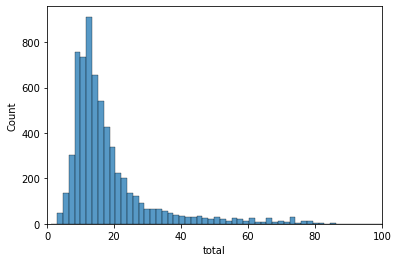

In [20]:
plt.figure()

sns.histplot(data['total'], bins=100, label='Total Fare Distribution')
plt.xlim(0,100)

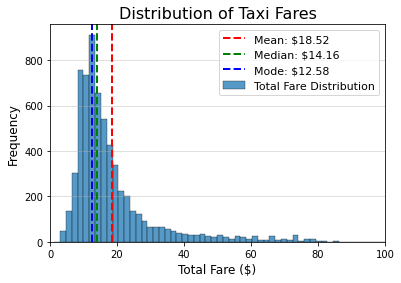

In [21]:
plt.figure()

#데이터 분포를 막대그래프로 시각화, bins=100: 최대값을 100개의 구간으로 나누어 빈도 표시, label: 범례에 표시될 이름
sns.histplot(data['total'], bins=100, label='Total Fare Distribution')
#x축 범위를 0~100으로 제한 (outlier 제외하고 주된 분포 확인을 위함)
plt.xlim(0,100)

#plt.axvline: x축 위에 세로선 추가, color:선 색상, linestyle='--': 점선, linewidth: 선 굵기, label: 범례 표시
#f"{변수:.nf}": n:소수점 자리수, f:부동소수점(floating point) 형식 (숫자를 보기 좋게, 깔끔하게 표현하기 위한 formating 방법)
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: ${mode_val:.2f}')

plt.title('Distribution of Taxi Fares', fontsize=16)
plt.xlabel('Total Fare ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.5)

plt.show()

# 데이터의 분포 확인하기

* 상자수염그림
* 바이롤린 플롯
* 스웜 플롯

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

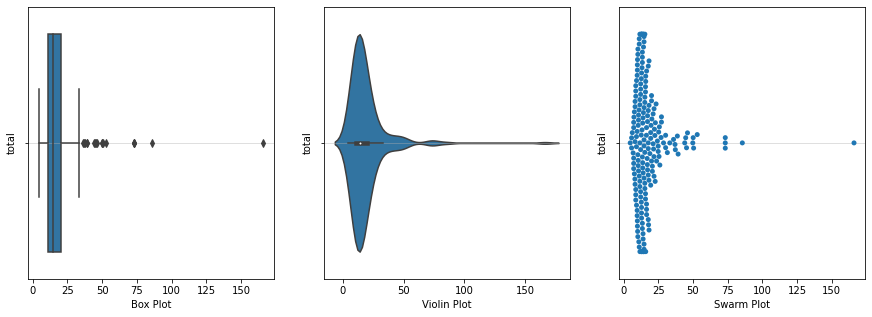

In [22]:
#sample: 데이터에서 랜덤으로 표본 200개 추출, random_state: 난수 seed 고정(재실행해도 같은 샘플 선택을 위함)
#전체 데이터가 많으면 시각화가 너무 밀집될 수 있기 때문에, 샘플링을 진행
#sample(): 무작위=랜덤 표본 추출이며, EDA/시각화 용도로 충분
#단, 통계적 대표성, 계층 구조, 시계열 특성을 고려해야 한다면 추가 샘플링 전략 필요
taxis_sample = data['total'].sample(n=200, random_state=42)
#전체 플롯 크기를 가로15, 세로5로 지정 (3개 서브플롯을 나란히 배치할 때 적절한 크기)
plt.figure(figsize=(15, 5))

#sub plot 1: Box Plot
plt.subplot(1, 3, 1) #1행 3열 중, 1번째 위치
sns.boxplot(taxis_sample) #사분위수, 중앙값, 이상치 표시
plt.xlabel('Box Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5) #y축 기준 눈금선 표시, 투명도 0.5

#sub plot 2: Violin Plot -> Box Plot에 커널 밀도 추정(KDE)을 겹쳐서 보여줌, 분포 모양을 직관적으로 확인 가능
#데이터가 어느 값에 몰려 있는지, 분포의 왜도(skewness, 데이터가 얼마나 비대칭적인지를 나타내는 통계량) 확인
#왜도(skewness)가 0이면 분포가 대칭적 = 정규분포
#왜도(skewness)가 0보다 크면 + = 비대칭적, 그래프의 오른쪽 꼬리가 김, 소득/임금과 같은 데이터 분포, 최빈값<중앙값<평균
#왜도(skewness)가 0보다 작으면 - = 비대칭적, 그래프의 왼쪽 꼬리가 김, 키와 같은 데이터 분포, 평균<중앙값<최빈값
plt.subplot(1, 3, 2) #1행 3열 중, 2번째 위치
sns.violinplot(taxis_sample)
plt.xlabel('Violin Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

#sub plot 3: Swarm Plot -> 각 데이터 포인트를 점으로 표현, 겹치지 않게 분산시킴 (단, 로딩 속도 오래 걸림)
plt.subplot(1, 3, 3)
sns.swarmplot(taxis_sample)
plt.xlabel('Swarm Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.show()

| 그래프         | 보여주는 정보                  |
| :-----------: | :------------------------: |
| Box Plot    | 중앙값, 사분위수(IQR), 이상치      |
| Violin Plot | Box Plot + 데이터 밀도(분포 모양) |
| Swarm Plot  | 개별 데이터 위치, 밀도 시각화        |


In [26]:
import kagglehub

# Download latest version 
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)
churn = pd.read_csv(path + '/' + os.listdir(path)[0])
churn.head()

ModuleNotFoundError: No module named 'kagglehub'

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print("ready!")

ready!


# 오늘의 미션

#### teleco-customer-churn 데이터셋의 MonthlyCharges 컬럼을 활용하여 오늘 배운 내용을 실습해봅시다.

**1. 데이터의 평균값과 중앙값, 최빈값을 구하고 히스토그램 위에 표시해봅시다.**